<a href="https://colab.research.google.com/github/akramtit23/Price-Prediction-Models/blob/main/Multiple_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/flight dataset /Clean_Dataset.csv')

# Display the first few rows
print(data.head())


   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [7]:
print(data.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [8]:
print(data.describe())

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


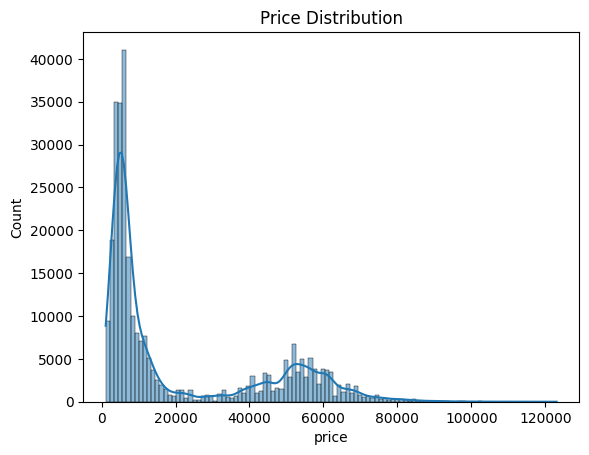

In [10]:
sns.histplot(data['price'], kde=True)
plt.title('Price Distribution')
plt.show()

In [15]:
def convert_to_minutes(duration):
    if isinstance(duration, str):  # Check if duration is a string
        hours, minutes = map(str, duration.split('h '))
        minutes = minutes.replace('m','')
        return int(hours) * 60 + int(minutes)
    # Handle non-string values
    elif isinstance(duration, (int, float)):
        # Handle NaN (Not a Number)
        if np.isnan(duration):
            return np.nan
        else:
            # Assuming the numeric value represents total minutes. If not, further logic needed.
            return int(duration)
    else:
        return np.nan  # Handle other unexpected data types

In [16]:
# Display the first few rows
print(data.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [25]:
# Assuming 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class' are categorical
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the categorical columns and encode them
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Convert 'duration' to minutes
data['duration'] = data['duration']*60

# Display the first few rows of the encoded dataset
print(data.head())


X = data.drop(['price', 'Unnamed: 0'], axis=1)  # Features
y = data['price']  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



   Unnamed: 0  airline   flight  source_city  departure_time  stops  \
0           0        4  SG-8709            2               2      2   
1           1        4  SG-8157            2               1      2   
2           2        0   I5-764            2               1      2   
3           3        5   UK-995            2               4      2   
4           4        5   UK-963            2               4      2   

   arrival_time  destination_city  class  duration  days_left  price  
0             5                 5      1      7200          1   5953  
1             4                 5      1      7200          1   5953  
2             1                 5      1      7200          1   5956  
3             0                 5      1      7200          1   5955  
4             4                 5      1      7200          1   5955  


In [27]:


X = data.drop(['price', 'Unnamed: 0', 'flight'], axis=1)  # Features
y = data['price']                # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(data.head())

   Unnamed: 0  airline   flight  source_city  departure_time  stops  \
0           0        4  SG-8709            2               2      2   
1           1        4  SG-8157            2               1      2   
2           2        0   I5-764            2               1      2   
3           3        5   UK-995            2               4      2   
4           4        5   UK-963            2               4      2   

   arrival_time  destination_city  class  duration  days_left  price  
0             5                 5      1      7200          1   5953  
1             4                 5      1      7200          1   5953  
2             1                 5      1      7200          1   5956  
3             0                 5      1      7200          1   5955  
4             4                 5      1      7200          1   5955  


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [31]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 1514.2434731014048
Mean Squared Error: 12803845.197120199
Root Mean Squared Error: 3578.2461062817074
R2 Score: 0.9751614248372219


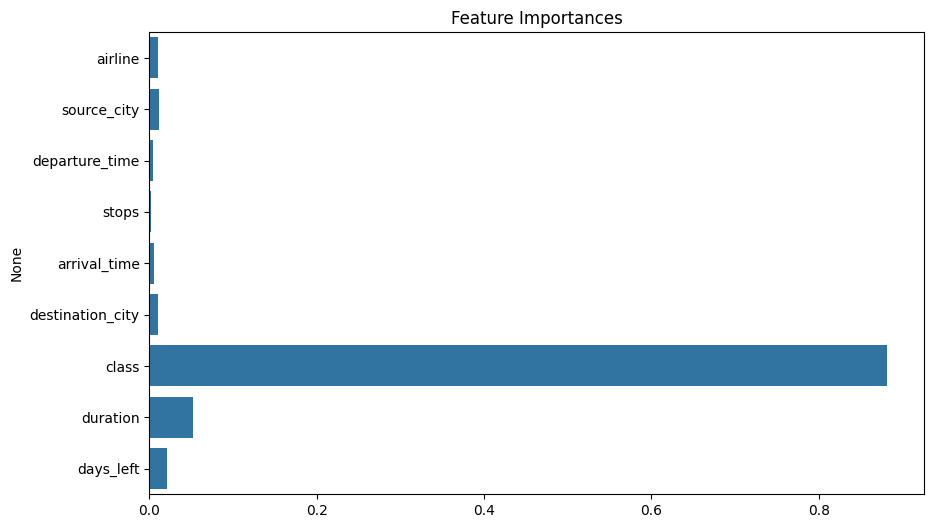

In [32]:
# Feature importance visualization
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()


In [33]:
import joblib
joblib.dump(model, 'flight_price_model.pkl')


['flight_price_model.pkl']

In [36]:
# prompt: save to drive

import joblib
from google.colab import drive
drive.mount('/content/drive')
joblib.dump(model, '/content/drive/MyDrive/flight_price_model.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/flight_price_model.pkl']